# STOCK MARKET ANALYSIS 


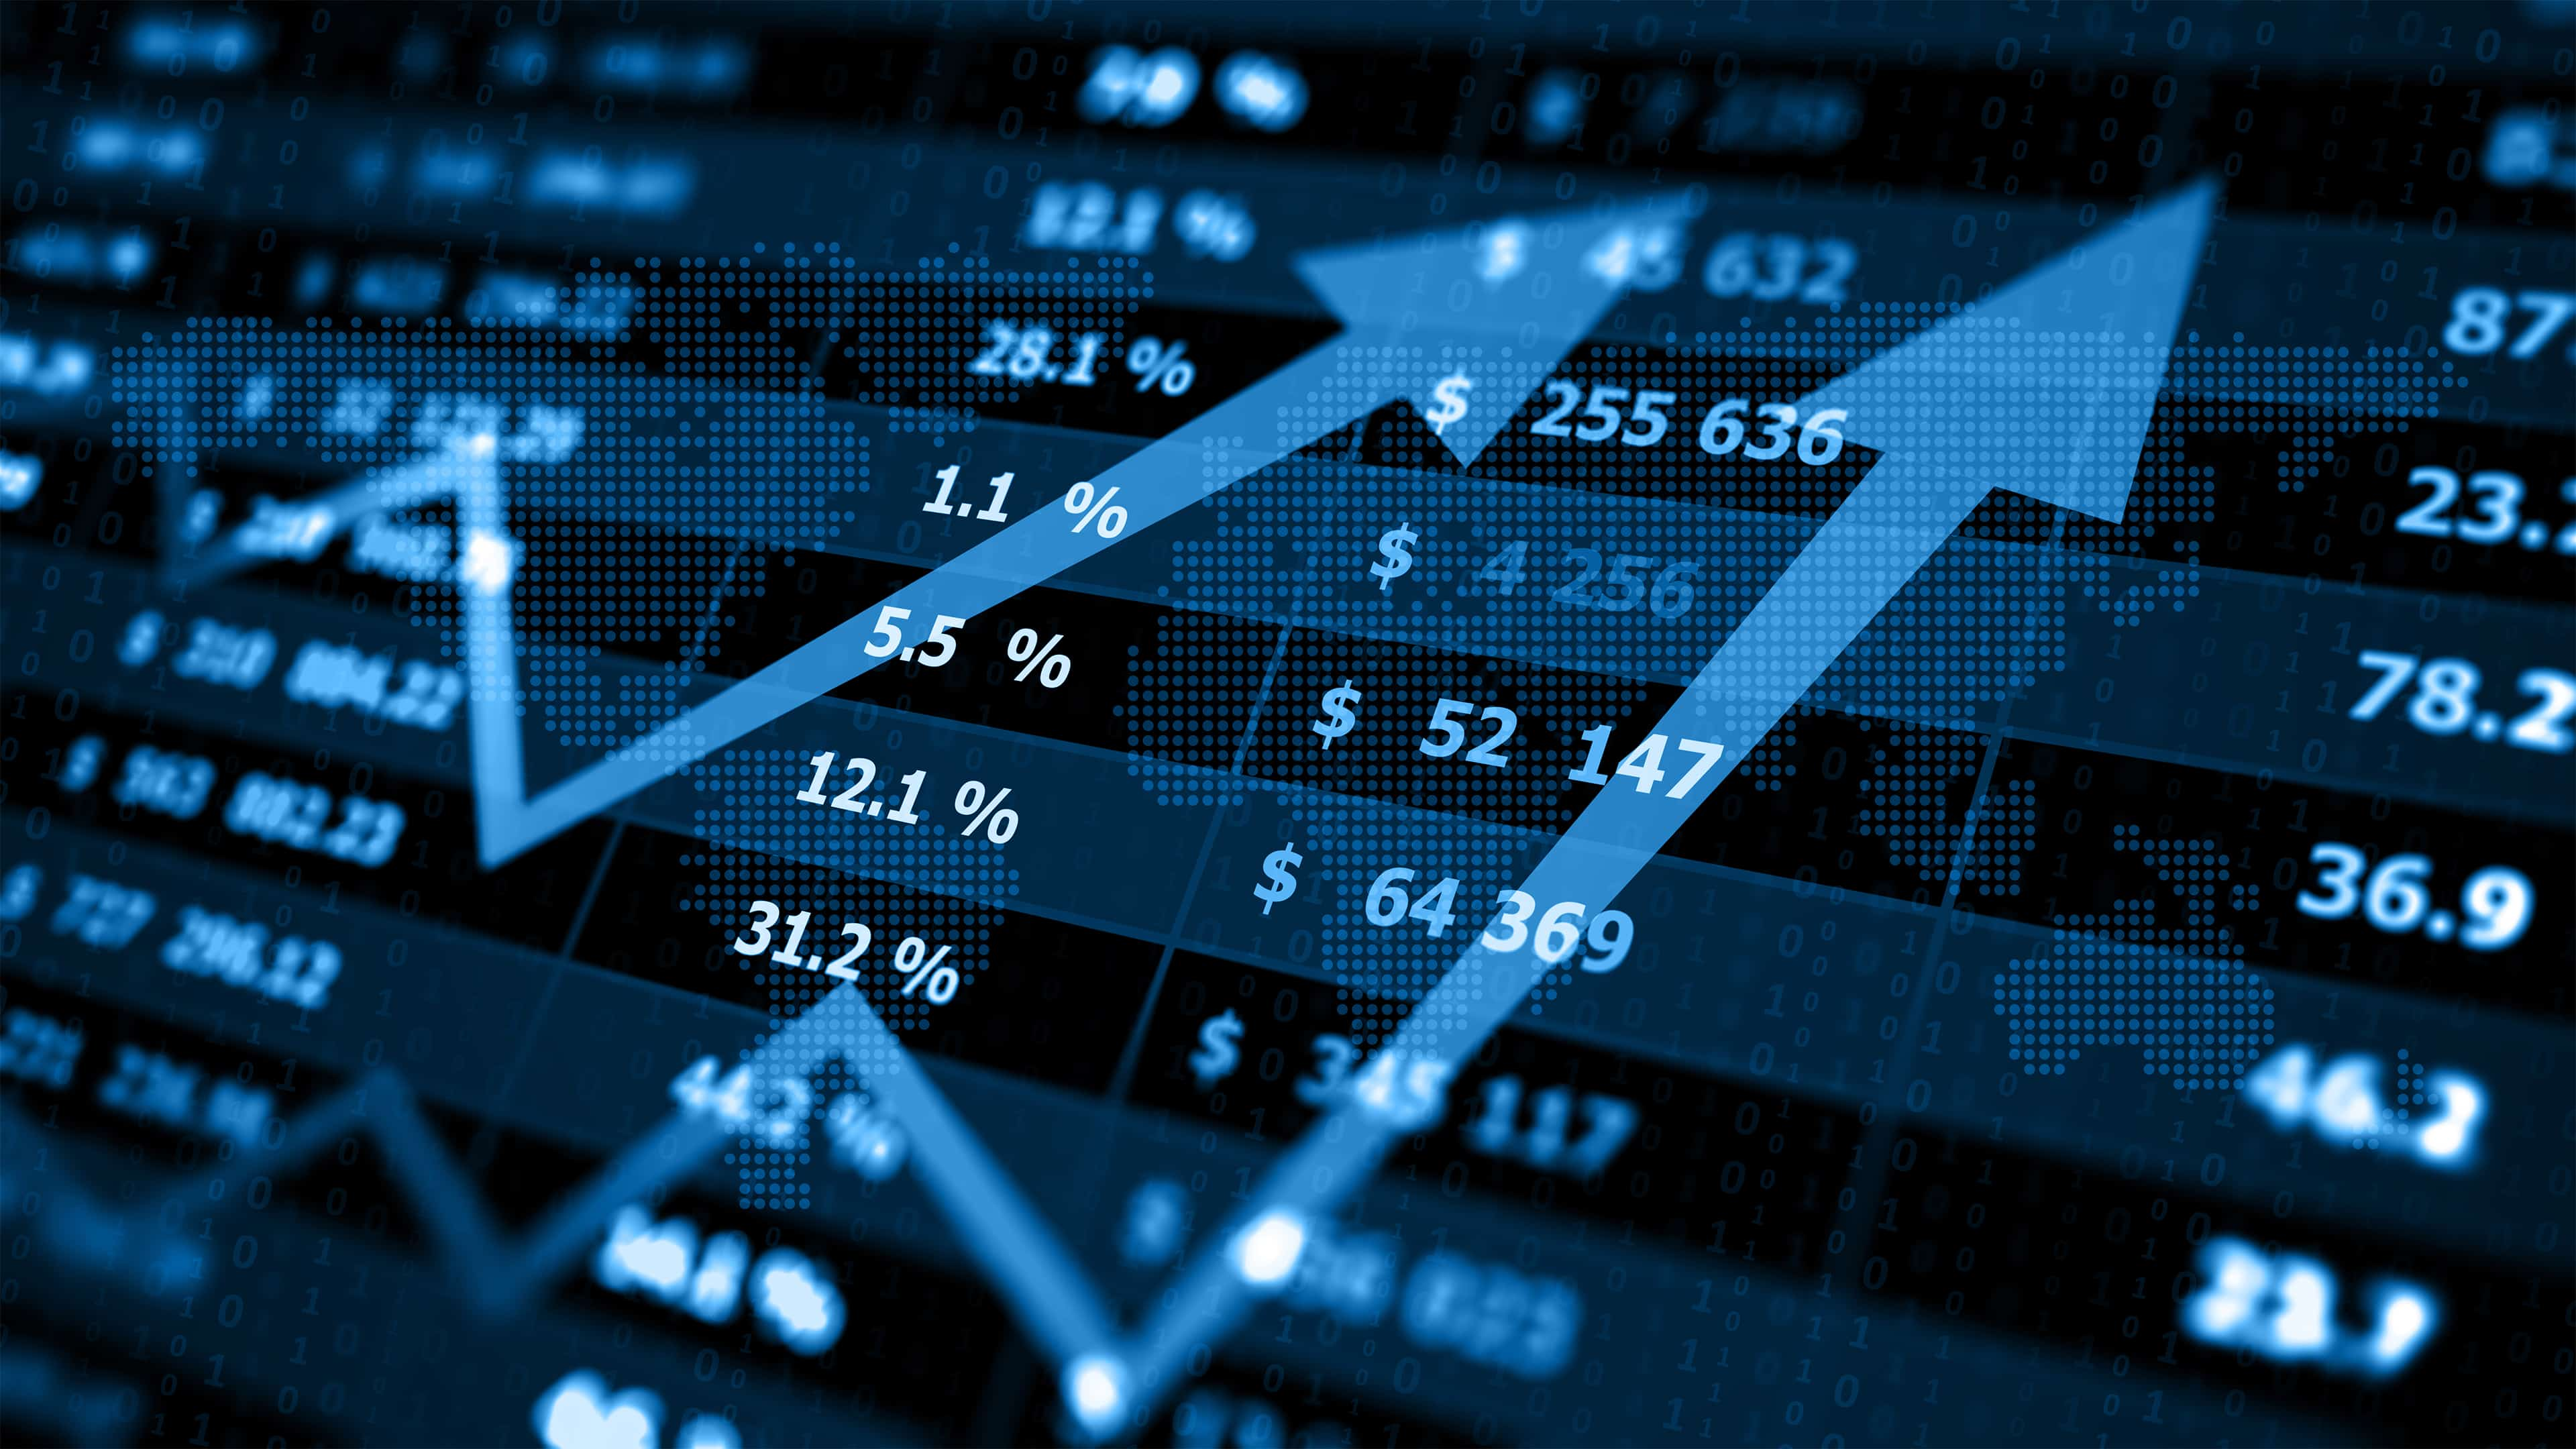

### What is stock?
A stock is an investment that represent a share or partial ownership of a company. Stock is company's profits; as a result, investors buy stocks to earn a return on their investment. Stocks are one of the best way to build up capital or wealth. Stock is low and high risk investment.

### Overview of the project:
In my project Stock Market analysis, I took the data of three companies Tesla, Ford and General Motors. I have performed Time-Series Analysis and later on I have performed Logistic Regression. So, basically one could never predict the stock market accurately because it's very uncertain and depends on various factors.


#### The columns of the dataset are:

1. Date -- The date of the record.
2. Open -- The opening price of the day (when trading starts).
3. High -- The highest trade price during the day.
4. Low -- The lowest trade price during the day.
5. Close -- The closing price for the day (when trading is finished).
6. Volume -- The number of shares traded.
7. Adj Close -- The daily closing price, adjusted retroactively to include any corporate actions. Read more here.

In [1]:
from IPython.core.debugger import set_trace
import time
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import datetime as dt


In [2]:
start=datetime.datetime(2015,1,1)
end=datetime.datetime(2021,4,1)

In [3]:
tesla=web.DataReader('TSLA','yahoo',start,end)
ford=web.DataReader('F','yahoo',start,end)
general_moters=web.DataReader('GM','yahoo',start,end)

In [4]:
tesla.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
tesla.shape 

(1574, 6)

In [6]:
tesla.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,45.136002,44.450001,44.618000,44.481998,11487500.0,44.481998
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999


In [7]:
ford.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,15.64,15.47,15.51,15.50,17930200.0,11.342379
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.239931
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,10.800872
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,10.698421
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,11.005764


In [8]:
general_moters.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,35.450001,34.889999,35.240002,34.910000,12004200.0,27.935520
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.879498
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.471392
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.887501
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.679714


In [9]:
tesla.to_csv('Tesla_stock.csv')
ford.to_csv('Ford_stock.csv')
general_moters.to_csv('GM_stock.csv')


In [10]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1574 entries, 2014-12-31 to 2021-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1574 non-null   float64
 1   Low        1574 non-null   float64
 2   Open       1574 non-null   float64
 3   Close      1574 non-null   float64
 4   Volume     1574 non-null   float64
 5   Adj Close  1574 non-null   float64
dtypes: float64(6)
memory usage: 86.1 KB


## 'OPEN' ANALYSIS

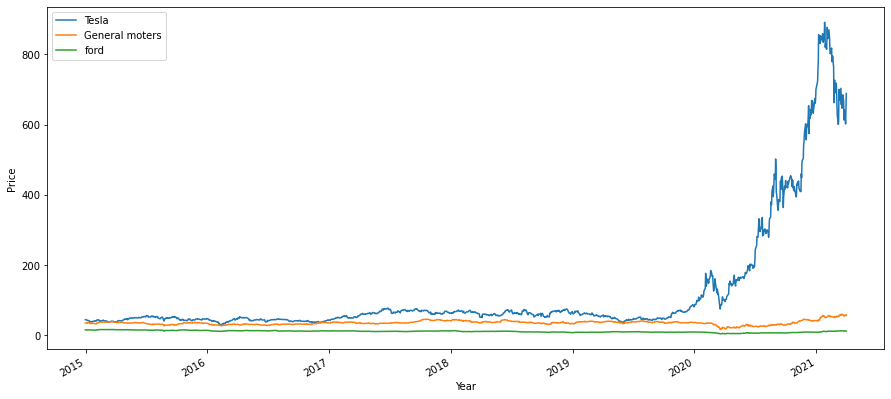

In [11]:
tesla['Open'].plot(label='Tesla',figsize=(15,7))
general_moters['Open'].plot(label='General moters')
ford['Open'].plot(label='ford')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

###### This analysis shows that Tesla has always been more valuable company then ford and GM. 

## 'VOLUME' ANALYSIS

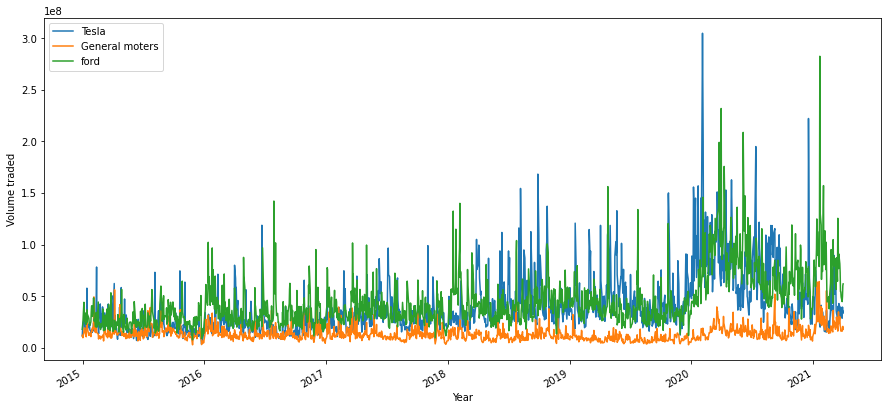

In [12]:
tesla['Volume'].plot(label='Tesla',figsize=(15,7))
general_moters['Volume'].plot(label='General moters')
ford['Volume'].plot(label='ford')
plt.xlabel('Year')
plt.ylabel('Volume traded')
plt.legend()
plt.show()

##### After seeing the above graph, we got to know that Tesla attains maximum shares in 2020 while Ford in 2021. But to get more insight on this let's check the particular date and find out why there is a sudden spike. 

In [13]:
tesla.iloc[[tesla['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-04,193.798004,166.776001,176.591995,177.412003,304694000.0,177.412003


<AxesSubplot:xlabel='Date'>

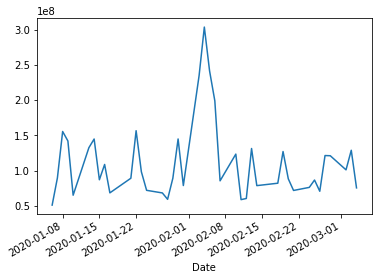

In [14]:
tesla['Volume']['2020-01-04':'2020-03-04'].plot()

<img src="tesla.png" width="600" length="1000">


In [15]:
ford.iloc[[ford['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-21,12.15,11.12,11.28,11.53,282394100.0,11.53


<AxesSubplot:xlabel='Date'>

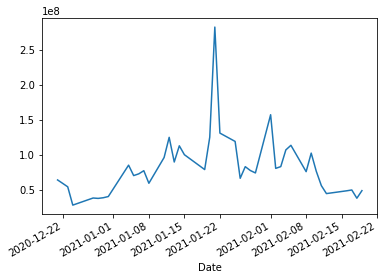

In [16]:
ford['Volume']['2020-12-21':'2021-02-21'].plot()

<img src="ford.png" width="600" length="1000">


##### But to get the more insight we cannot only tell by the open prices, for that we need to look into the market capital.

### MARKET CAPITAL ANALYSIS
##### MARKET CAPITAL = OPEN PRICE * VOLUME

In [17]:
tesla['Total_Traded']=tesla['Open']*tesla['Volume']
ford['Total_Traded']=ford['Open']*ford['Volume']
general_moters['Total_Traded']=general_moters['Open']*general_moters['Volume']


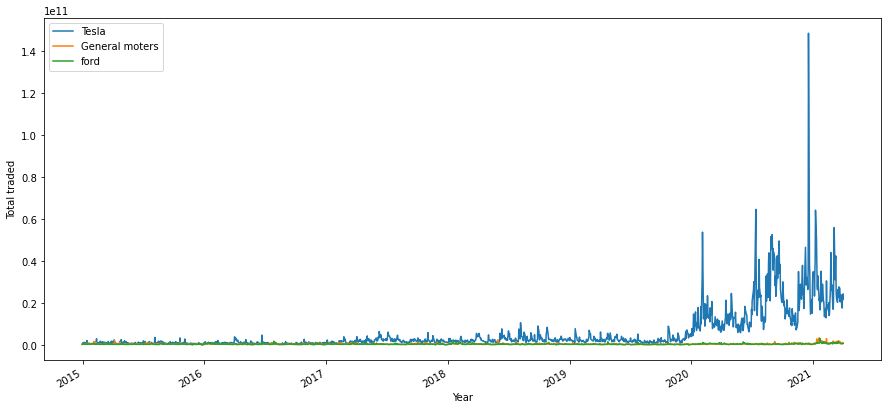

In [18]:
tesla['Total_Traded'].plot(label='Tesla',figsize=(15,7))
general_moters['Total_Traded'].plot(label='General moters')
ford['Total_Traded'].plot(label='ford')
plt.xlabel('Year')
plt.ylabel('Total traded')
plt.legend()
plt.show()

##### From the above graph we can see that there is huge amount of money traded for Tesla in the year 2020-21

In [19]:
tesla['Total_Traded'].argmax()

1503

In [20]:
tesla.iloc[[tesla['Total_Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total_Traded
Date,,,,,,,
2020-12-18,695.0,628.539978,668.900024,695.0,222126200.0,695.0,1.485802e+11


<img src="tesla mc.png" width="600" length="1000">

## MOVING AVERAGE

##### Moving Average: It is a classical smoothing method in time series, a way to make data more reliable or robust against noices.

<AxesSubplot:xlabel='Date'>

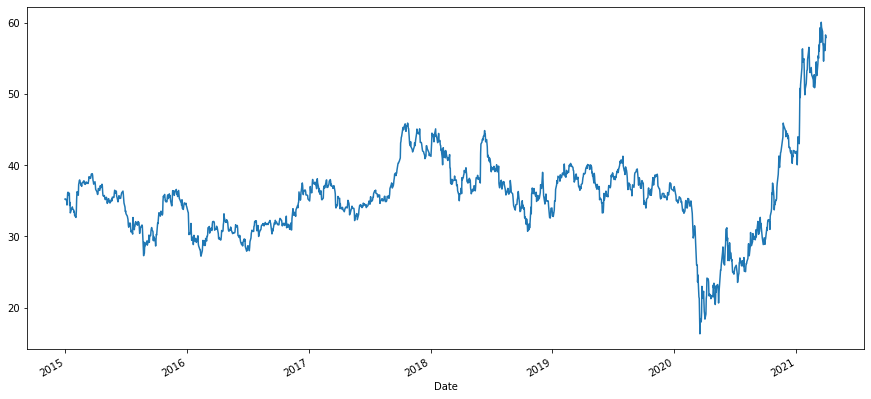

In [21]:
general_moters['Open'].plot(figsize=(15,7))

##### As you can see in the above graph there is a lot of noice going on, so data might not be that reliable. That is why we need moving average model.
##### Rolling Mean smoothens out short-term fluctuation and highlight longer-term trends in the data.

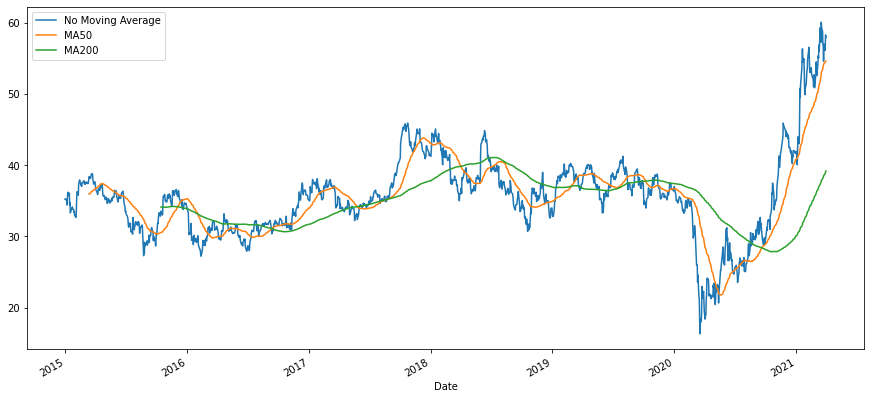

In [22]:
general_moters['Open'].plot(label='No Moving Average',figsize=(15,7))
general_moters['MA50']=general_moters['Open'].rolling(50).mean()
general_moters['MA50'].plot(label='MA50')
general_moters['MA200']=general_moters['Open'].rolling(200).mean()
general_moters['MA200'].plot(label='MA200')
plt.legend()
plt.show()
#When your moving size is too high as you can see in the graph it might miss some trends, so it is better to keep it a little low.

## CORRELATION AND SCATTER PLOT

In [23]:
company=pd.concat([tesla['Open'],general_moters['Open'],ford['Open']],axis=1)
company.columns=['tesla open','general moters open','ford open']

array([[<AxesSubplot:xlabel='tesla open', ylabel='tesla open'>,
        <AxesSubplot:xlabel='general moters open', ylabel='tesla open'>,
        <AxesSubplot:xlabel='ford open', ylabel='tesla open'>],
       [<AxesSubplot:xlabel='tesla open', ylabel='general moters open'>,
        <AxesSubplot:xlabel='general moters open', ylabel='general moters open'>,
        <AxesSubplot:xlabel='ford open', ylabel='general moters open'>],
       [<AxesSubplot:xlabel='tesla open', ylabel='ford open'>,
        <AxesSubplot:xlabel='general moters open', ylabel='ford open'>,
        <AxesSubplot:xlabel='ford open', ylabel='ford open'>]],
      dtype=object)

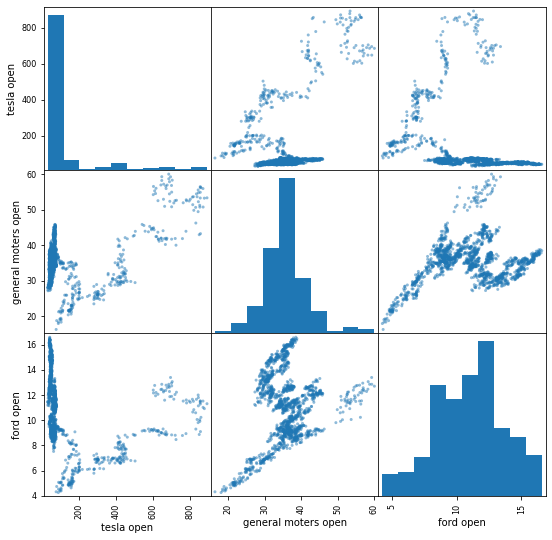

In [24]:
scatter_matrix(company,figsize=(9,9))

##### According to the above plots we can see that probably there is no high correlation as there is not straight line forming in any of the scatter plot, but to be more precise as we can see there is half way straight line plot between ford and general moters.

## ARIMA Model

##### ARIMA (Auto Regressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.Any Stationary time series can be modeled with ARIMA MODEL. 

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.

An ARIMA model is characterized by 3 terms p, d, q:
- p is the order of the AR term
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

Auto Regressive in ARIMA means that the model is a linear regression that uses its own lags as a predictor.Linear regression models, as we know, work best when the predictors are independent of each other. Otherwise we run into multicollinearity issues where the regression becomes unstable due to correlation.
##### p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 
##### q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.



### Stationarity
subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do it multiple times.
And the minimum number of differencing needed to make the series stationary needs to be imputed in our ARIMA model.
 
### ADF test (Augumented Dickey Fuller)
To check the series is stationary or not.
##### The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value is less than the significance level(0.05) then we can reject the null hypothesis and infer that the time series is stationary.

So if the p-value>0.05 we'll need to find the order of differencing.


In [25]:
#check if the series is stationary
from statsmodels.tsa.stattools import adfuller

result=adfuller(tesla.Close.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")
print('###################')
result=adfuller(ford.Close.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")
print('###################')
result=adfuller(general_moters.Close.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")

ADF Statistic:0.515292248762785
p-value:0.9853305548950813
###################
ADF Statistic:-1.892040913325866
p-value:0.33581453012888707
###################
ADF Statistic:-1.1882252704317253
p-value:0.678640282862864


###### By the above p values we can see that the series is not stationary in all the cases.

### Differencing

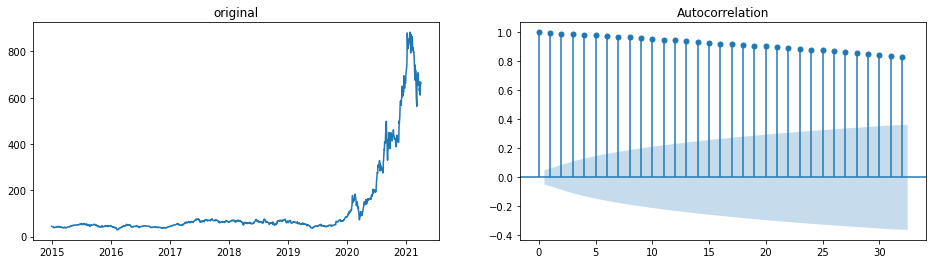

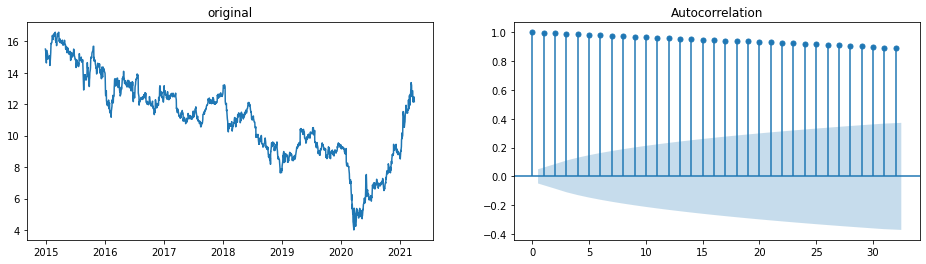

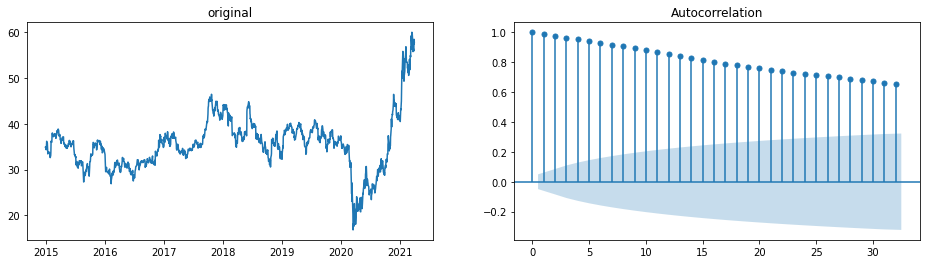

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(tesla.Close)
ax1.set_title("original")
plot_acf(tesla.Close,ax=ax2);

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(ford.Close)
ax1.set_title("original")
plot_acf(ford.Close,ax=ax2);

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(general_moters.Close)
ax1.set_title("original")
plot_acf(general_moters.Close,ax=ax2);  ##add ';' so that the plot is not duplicated

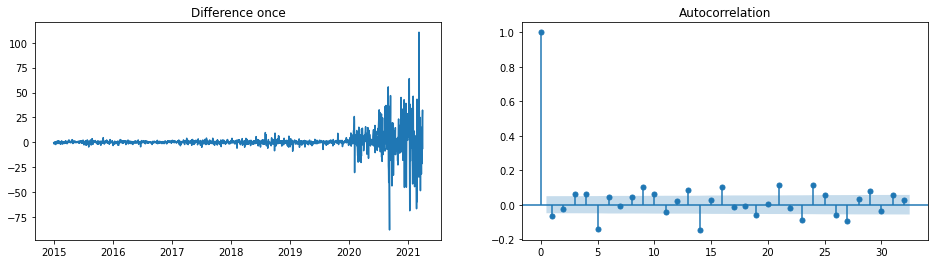

In [27]:
diff = tesla.Close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff,ax=ax2);

In [28]:
#to get the direct value of differencing we can also use the below code
from pmdarima.arima.utils import ndiffs

print(ndiffs(tesla.Close,test="adf"))
print(ndiffs(ford.Close,test="adf"))
print(ndiffs(general_moters.Close,test="adf"))

1
1
1


 ##### As not much difference is visible than we'll only take one order of differencing.

 ### p-Value
 We can find out the required number of AR terms by inspecting the partial auto-correltion plot.

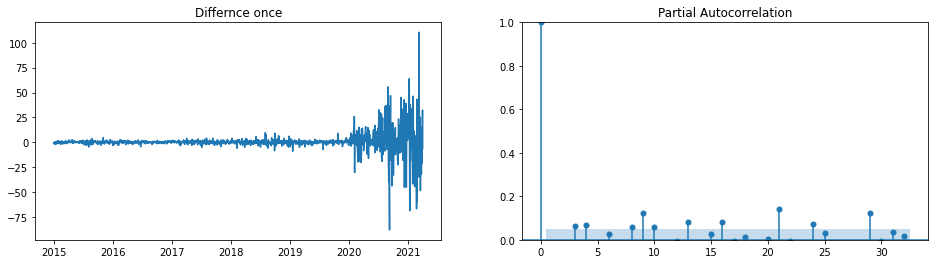

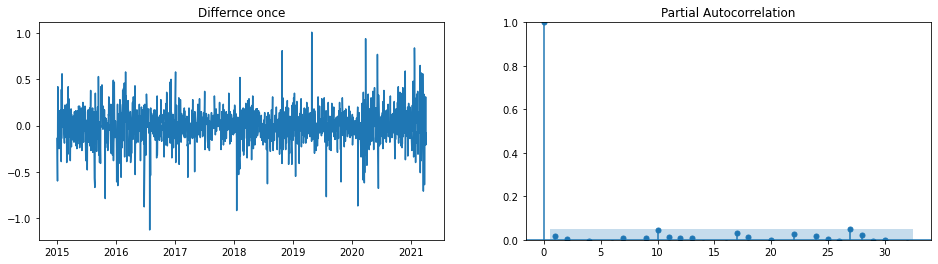

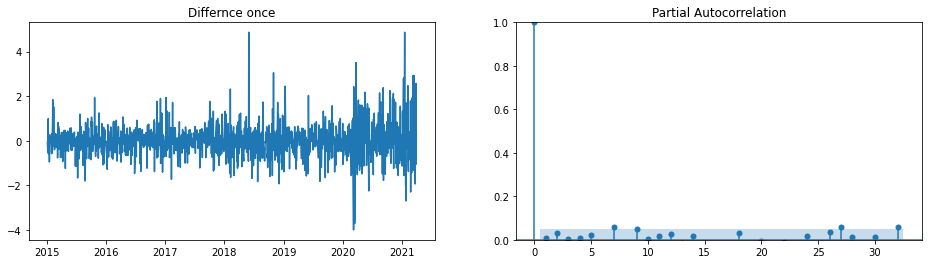

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf

diff=tesla.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differnce once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

diff=ford.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differnce once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

diff=general_moters.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Differnce once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

We can observe that the PACF lag for Tesla  21 is significant as it's above the significant line, for Ford 10 is significant and for General Moters 7 is significant.

### q-value
q is the order of the Moving Average term. We can look at the ACF plot for the number of MA terms.

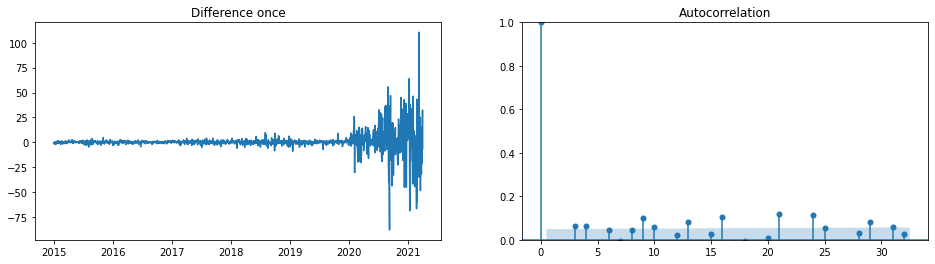

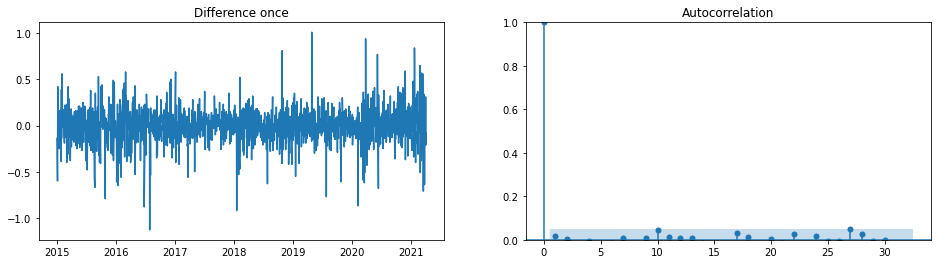

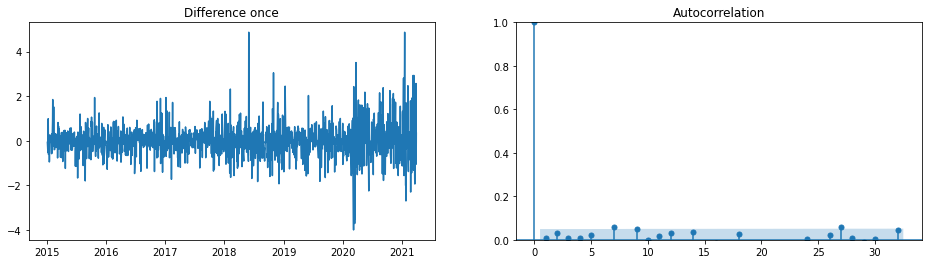

In [30]:
#Tesla
diff = tesla.Close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);
#Ford
diff = ford.Close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);
#General Moters
diff = general_moters.Close.diff().dropna()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

###### According to the above graph for Tesla 3 is suitable for q, for Ford 10, 9 for General Moters

### Fitting the ARIMA model

In [31]:
##### for Tesla

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [32]:
from statsmodels.tsa.arima_model import ARIMA
model_tesla=ARIMA(tesla.Close,order=(21,1,3))
result_tesla=model_tesla.fit(disp=0)

C:\Users\surbhi thakur\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\surbhi thakur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no asso

In [33]:
print(result_tesla.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1573
Model:                ARIMA(21, 1, 3)   Log Likelihood               -5610.361
Method:                       css-mle   S.D. of innovations              8.559
Date:                Thu, 13 May 2021   AIC                          11272.721
Time:                        18:20:01   BIC                          11412.101
Sample:                             1   HQIC                         11324.522
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3902      0.287      1.359      0.174      -0.173       0.953
ar.L1.D.Close      0.2858      0.247      1.158      0.247      -0.198       0.770
ar.L2.D.Close     -0.3260      0.131

##### We can see in the above result that we have 21 Ar terms and 3 MA terms, we have coeff of linear regression and in that case and if it is very close to 0, then we can remove that terms. And also our p-value should be low so as to know that the terms our important for our model.


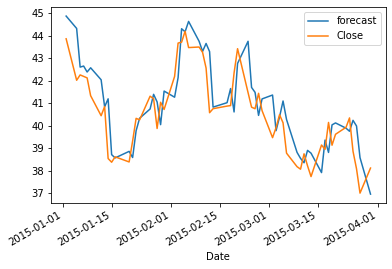

In [34]:
#Actual vs Preedicted for Tesla
result_tesla.plot_predict(start=1,end=60,dynamic=False);

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model_generalmoters=ARIMA(general_moters.Close,order=(7,1,9))
result_generalmoters=model_generalmoters.fit(disp=0)

C:\Users\surbhi thakur\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\surbhi thakur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no asso

In [36]:
print(result_generalmoters.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1573
Model:                 ARIMA(7, 1, 9)   Log Likelihood               -1697.548
Method:                       css-mle   S.D. of innovations              0.710
Date:                Thu, 13 May 2021   AIC                           3431.095
Time:                        18:25:16   BIC                           3527.589
Sample:                             1   HQIC                          3466.957
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.019      0.742      0.458      -0.023       0.052
ar.L1.D.Close    -0.2035      0.687     -0.296      0.767      -1.550       1.143
ar.L2.D.Close    -0.2926      0.340     

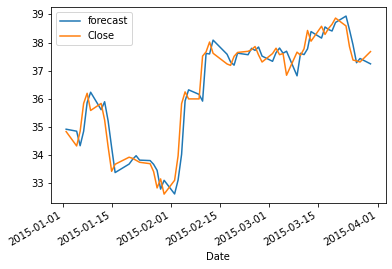

In [37]:
#Actual vs Preedicted for Tesla
result_generalmoters.plot_predict(start=1,end=60,dynamic=False);

#### ARIMA model might seem very intresting and simple to use in stock market problems as they use past performance to predict the future values but they are not very suitable for training algorithm when it comes to the stock market because we cannot just use close prices in order to predict future prices.

Now, I know Logistic Regression might not be the perfect model to work with in our case. We should make use of Deep learning models such as LSTM but I didn't wanted to just apply it here without full understanding of the working and the concept of the LSTM. So, for now we'll be just moving forward with Logistic Regression.

## Building the regression model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

### TESLA

In [15]:
X=tesla[['High','Low','Open','Volume']].values
y=tesla['Close'].values

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
regressor=LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print(regressor.coef_)

[ 1.02128989e+00  6.38318336e-01 -6.66547723e-01 -9.43952314e-09]


In [20]:
pred=regressor.predict(X_test)

In [21]:
print(pred)

[577.38998919  40.2213408   46.6959119   49.80897327  38.48983809
  48.64303061  39.65769671  68.4043218   59.66357446 733.39538532
 187.29397835  38.91326238  49.59560178  48.82859416  47.60192778
  44.30453259  59.01776324  41.87718324  42.53496128  64.08698187
  64.18310923  64.32301587  52.99797508  45.48527191 101.61513064
  62.18639777  42.74835466  46.59252998  61.76286652 784.09010419
  69.48322361  50.1765648   47.81643523  44.5028369   43.21301011
 162.58560101  70.56586497 326.33855657 163.84878394  49.2141243
  44.84872306 404.66752122 623.74172581  49.11810482  41.60118569
  73.76714703  60.331884    59.41418414  46.70258689  62.08667394
 289.09962351  74.00875184 426.90418845  40.54963904  65.9716937
  71.71212789  39.45806533  71.35626004  49.79353079  50.63172557
  46.4864994   45.99494915  47.30697429  38.53348555  49.07527499
  61.23411012  61.25112152  60.82931747  54.3749641  199.01786461
  41.67027278 867.56975297  64.25671162  43.06502917  51.59923616
  50.0623122

In [22]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':pred.flatten()})

In [23]:
df.head(10)

,Actual,Predicted
0,584.760010,577.389989
1,39.874001,40.221341
2,46.542000,46.695912
3,49.577999,49.808973
4,38.240002,38.489838
5,48.938000,48.643031
6,39.130001,39.657697
7,68.994003,68.404322
8,59.804001,59.663574
9,735.109985,733.395385


In [24]:
graph=df.head(20)

<AxesSubplot:>

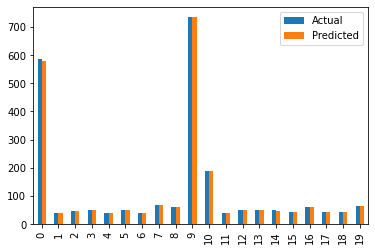

In [25]:
graph.plot(kind='bar')

## FORD

In [4]:
Xford=ford[['High','Low','Open','Volume']].values
yford=ford['Close'].values

In [7]:
Xford_train,Xford_test,yford_train,yford_test=train_test_split(Xford,yford,test_size=0.2,random_state=0)

In [9]:
regressor.fit(Xford_train,yford_train)

LinearRegression()

In [10]:
print(regressor.coef_)

[ 9.92838695e-01  4.79750774e-01 -4.77769235e-01 -9.96791023e-10]


In [11]:
predford=regressor.predict(Xford_test)

In [12]:
print(predford)

[ 9.32698217 14.56082661 14.09839593  8.83450185 11.78439977  9.04387694
 16.33432233  8.60514596  9.78345404  8.64442688  7.55471577 11.94825079
 13.65486227  9.52341769 10.25870774 13.4229406   8.71553641 12.75051808
 12.4146561  10.7905608  11.10444175 11.08945243 12.7773883   9.35929326
  9.15660492 11.62261555  8.86164965 10.35753897  9.22133952 11.43011745
  9.48587412 12.44084616 14.09227063 13.875951   16.33077202  5.21104481
 10.95851885  7.05511645  5.58224525 14.09654461  9.8954027   6.61347366
  8.81901957 12.88662876 13.14647974  8.61522856  9.48325065 11.28365521
  9.32579203  8.87278301  6.6165904  11.98459087  6.88512872 14.73250646
 11.16266792  8.70818988 16.4519817  11.30714206 14.82725643  9.11697242
  9.59638444 15.90798948 12.56238985 14.9742659  13.41226714  8.61819036
  8.40683773 11.14746429  8.72044003  6.37761748 16.01654833  8.97764792
 11.06466123 14.12938518 10.10370691 12.5465099  12.90789354 12.58837028
 11.11721447 12.53406791  4.25766725  5.91146953  6

In [13]:
dfford=pd.DataFrame({'Actual':yford_test.flatten(),'Predicted':predford.flatten()})

In [14]:
dfford.head(10)

,Actual,Predicted
0,9.24,9.326982
1,14.46,14.560827
2,13.98,14.098396
3,8.78,8.834502
4,11.94,11.784400
5,8.90,9.043877
6,16.34,16.334322
7,8.67,8.605146
8,9.78,9.783454
9,8.65,8.644427


In [23]:
graphford=dfford.head(20)

<AxesSubplot:>

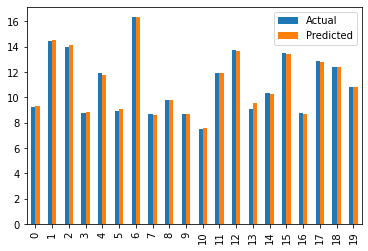

In [24]:
graphford.plot(kind='bar')

## GENERAL MOTERS

In [15]:
Xgm=general_moters[['High','Low','Open','Volume']].values
ygm=general_moters['Close'].values

In [16]:
Xgm_train,Xgm_test,ygm_train,ygm_test=train_test_split(Xgm,ygm,test_size=0.2,random_state=0)

In [17]:
regressor.fit(Xford_train,yford_train)

LinearRegression()

In [18]:
print(regressor.coef_)

[ 9.92838695e-01  4.79750774e-01 -4.77769235e-01 -9.96791023e-10]


In [19]:
predgm=regressor.predict(Xgm_test)

In [20]:
print(predgm)

[44.87089496 33.05929437 35.55936879 35.83983542 29.44496466 36.62983023
 38.53528387 34.50583093 35.7577897  41.63695843 31.22729624 31.78211748
 29.86639684 37.39361776 38.54686494 31.62847813 38.2734344  30.22372534
 28.27616644 39.44947109 37.82583459 34.23668072 29.65678206 39.36744738
 35.50279933 34.7585337  36.6826455  38.86941731 33.49753292 52.7190293
 36.67046557 37.45075216 29.96208195 33.10340713 37.40132079 25.09860716
 42.44522497 27.95169193 25.75476888 31.84003037 38.27937545 28.95947697
 40.8359247  30.04278562 30.37416393 35.47813434 35.94139996 38.95033509
 39.33838504 37.90799196 24.72049641 43.83396996 29.98598049 32.93161364
 36.12760957 34.97509788 38.65235161 34.6689431  35.12693341 36.17842165
 39.55701847 35.52504238 37.41809476 34.03808893 32.00364631 38.62865912
 38.80757065 36.38653014 39.13073935 27.02621919 35.95220139 42.81584577
 33.57251103 35.17659715 40.64321002 36.05674187 37.33345088 37.17155932
 34.28620624 36.86374312 18.10801904 27.93268363 29.

In [21]:
dfgm=pd.DataFrame({'Actual':ygm_test.flatten(),'Predicted':predgm.flatten()})

In [22]:
dfgm.head(10)

,Actual,Predicted
0,44.680000,44.870895
1,32.840000,33.059294
2,35.470001,35.559369
3,35.570000,35.839835
4,29.639999,29.444965
5,36.110001,36.629830
6,38.650002,38.535284
7,34.730000,34.505831
8,35.730000,35.757790
9,41.660000,41.636958


In [25]:
graphgm=dfgm.head(20)

<AxesSubplot:>

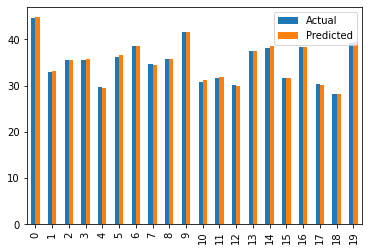

In [26]:
graphgm.plot(kind='bar')